In [1]:
import pandas as pd
import numpy as np

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
## create dtf

data = pd.read_csv("data.csv")

## dropping all columns except the following
data = data[['student_star','comments']]

# 5.0 to 4.0 - Good
# 3.5 to 2.5 - Average
# 2.0 to 1.0 - Bad

data['student_star'] = data['student_star'].replace([5.0],'Good')
data['student_star'] = data['student_star'].replace([4.5],'Good')
data['student_star'] = data['student_star'].replace([4.0],'Good')

data['student_star'] = data['student_star'].replace([3.5],'Average')
data['student_star'] = data['student_star'].replace([3.0],'Average')
data['student_star'] = data['student_star'].replace([2.5],'Average')

data['student_star'] = data['student_star'].replace([2.0],'Bad')
data['student_star'] = data['student_star'].replace([1.5],'Bad')
data['student_star'] = data['student_star'].replace([1.0],'Bad')

## rename columns
data = data.rename(columns={"student_star":"Labels", "comments":"Text"})

## dropping rows with na
data = data.dropna()

## print 5 random rows
data.sample(5)

## removing blank rows
data = data.dropna()

In [3]:
## Class distribution

data['Labels'].value_counts()

Good       11814
Bad         4764
Average     3415
Name: Labels, dtype: int64

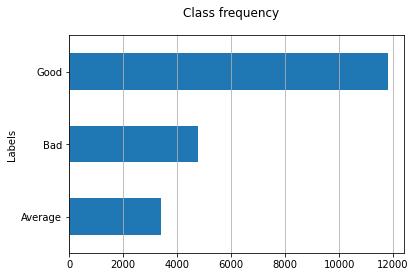

In [4]:
## Plotting class distribution

fig, ax = plt.subplots()
fig.suptitle("Class frequency", fontsize=12)
data["Labels"].reset_index().groupby("Labels").count().sort_values(by = "index").plot(kind = "barh", legend=False, ax=ax).grid(axis = 'x')
plt.show()

In [5]:
## Downloading and storing english stop words

nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Teacher\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
## Data snapshot

data.head()

,Labels,Text
0,Good,"This class is hard, but its a two-in-one gen-e..."
1,Good,Definitely going to choose Prof. Looney\'s cla...
2,Good,I overall enjoyed this class because the assig...
3,Good,"Yes, it\'s possible to get an A but you\'ll de..."
4,Good,Professor Looney has great knowledge in Astron...


In [7]:
#Removing punctuation
data['Text'] = data['Text'].str.replace('[^\w\s]','')

#Removing stopwords
data['Text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['Text'] = data['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#Stemming
stemmer = PorterStemmer()
data['Text'] = data['Text'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))

c:\users\teacher\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [8]:
## Split data into 70% training and 30% testing set

feature_cols = ['Text']
X = data[feature_cols]
y = data.Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [9]:
## Using Count vectorizer to get features from words

vect = CountVectorizer(analyzer = "word")
X_train_dtm = vect.fit_transform(X_train.Text)
X_test_dtm = vect.transform(X_test.Text)
print(X_train_dtm.shape)
print(X_test_dtm.shape)

(13995, 12459)
(5998, 12459)


In [10]:
## Preparing a dataframe to store the results

evaluation = pd.read_csv("results.csv")

##### Loading the different ML models.
##### Training and Testing

c:\users\teacher\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,



Logistic Regression:
	Accuracy: 0.6767255751917306
	Precision: 0.5786354433708013
	Recall: 0.5707447806708891
	F1-Score: 0.5742248084501202
Detail:
              precision    recall  f1-score   support

     Average       0.31      0.28      0.30      1020
         Bad       0.65      0.61      0.63      1450
        Good       0.78      0.82      0.80      3528

    accuracy                           0.68      5998
   macro avg       0.58      0.57      0.57      5998
weighted avg       0.67      0.68      0.67      5998



(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'Average'), Text(0, 1.5, 'Bad'), Text(0, 2.5, 'Good')])

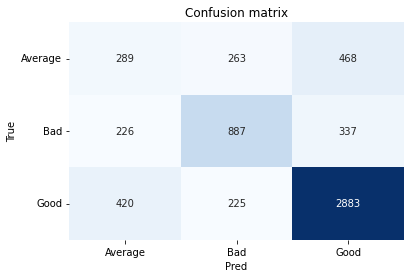

In [11]:
model = LogisticRegression(C=1e9)
model.fit(X_train_dtm, y_train)
y_pred_class = model.predict(X_test_dtm)

acuracy = metrics.accuracy_score(y_test, y_pred_class)
precision = metrics.precision_score(y_test, y_pred_class, average='macro')
recall = metrics.recall_score(y_test, y_pred_class, average='macro')
f1score = metrics.f1_score(y_test, y_pred_class, average='macro')

print("\nLogistic Regression:")
print("\tAccuracy:",acuracy)
print("\tPrecision:",precision)
print("\tRecall:",recall)
print("\tF1-Score:",f1score)

new_row = {'Approach':'Machine Learning + Count Vectorizer + Text Preprocessing', 
           'Algorithm':'Logistic Regression', 
           'Accuracy':acuracy, 
           'Precision':precision,
           'Recall':recall,
           'F1-Score':f1score
          }

evaluation = evaluation.append(new_row, ignore_index=True)


print("Detail:")
print(metrics.classification_report(y_test, y_pred_class))

classes = np.unique(y_test)

## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred_class)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)


SVM:
	Accuracy: 0.7277425808602868
	Precision: 0.6485680133618481
	Recall: 0.5613202292411218
	F1-Score: 0.5586572699026799
Detail:
              precision    recall  f1-score   support

     Average       0.48      0.10      0.17      1020
         Bad       0.73      0.64      0.68      1450
        Good       0.74      0.95      0.83      3528

    accuracy                           0.73      5998
   macro avg       0.65      0.56      0.56      5998
weighted avg       0.69      0.73      0.68      5998



(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'Average'), Text(0, 1.5, 'Bad'), Text(0, 2.5, 'Good')])

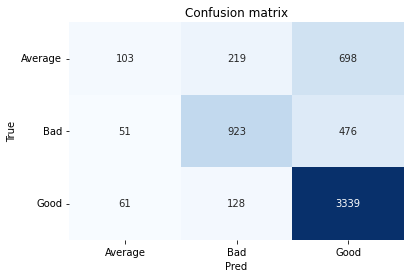

In [12]:
model = SVC()
model.fit(X_train_dtm, y_train)
y_pred_class = model.predict(X_test_dtm)

acuracy = metrics.accuracy_score(y_test, y_pred_class)
precision = metrics.precision_score(y_test, y_pred_class, average='macro')
recall = metrics.recall_score(y_test, y_pred_class, average='macro')
f1score = metrics.f1_score(y_test, y_pred_class, average='macro')

print("\nSVM:")
print("\tAccuracy:",acuracy)
print("\tPrecision:",precision)
print("\tRecall:",recall)
print("\tF1-Score:",f1score)

new_row = {'Approach':'Machine Learning + Count Vectorizer + Text Preprocessing', 
           'Algorithm':'SVM', 
           'Accuracy':acuracy, 
           'Precision':precision,
           'Recall':recall,
           'F1-Score':f1score
          }

evaluation = evaluation.append(new_row, ignore_index=True)


print("Detail:")
print(metrics.classification_report(y_test, y_pred_class))

classes = np.unique(y_test)

## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred_class)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)


Multinomial NB:
	Accuracy: 0.7287429143047682
	Precision: 0.6359382764365487
	Recall: 0.583221625815077
	F1-Score: 0.5927547943157985
Detail:
              precision    recall  f1-score   support

     Average       0.41      0.19      0.26      1020
         Bad       0.74      0.64      0.68      1450
        Good       0.76      0.92      0.83      3528

    accuracy                           0.73      5998
   macro avg       0.64      0.58      0.59      5998
weighted avg       0.70      0.73      0.70      5998



(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'Average'), Text(0, 1.5, 'Bad'), Text(0, 2.5, 'Good')])

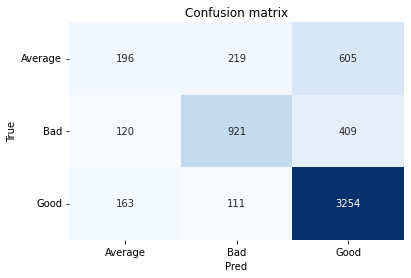

In [13]:
model = MultinomialNB()
model.fit(X_train_dtm, y_train)
y_pred_class = model.predict(X_test_dtm)

acuracy = metrics.accuracy_score(y_test, y_pred_class)
precision = metrics.precision_score(y_test, y_pred_class, average='macro')
recall = metrics.recall_score(y_test, y_pred_class, average='macro')
f1score = metrics.f1_score(y_test, y_pred_class, average='macro')

print("\nMultinomial NB:")
print("\tAccuracy:",acuracy)
print("\tPrecision:",precision)
print("\tRecall:",recall)
print("\tF1-Score:",f1score)

new_row = {'Approach':'Machine Learning + Count Vectorizer + Text Preprocessing', 
           'Algorithm':'Multinomial NB', 
           'Accuracy':acuracy, 
           'Precision':precision,
           'Recall':recall,
           'F1-Score':f1score
          }

evaluation = evaluation.append(new_row, ignore_index=True)


print("Detail:")
print(metrics.classification_report(y_test, y_pred_class))

classes = np.unique(y_test)

## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred_class)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)


Decision Tree:
	Accuracy: 0.6308769589863288
	Precision: 0.5186935534899574
	Recall: 0.5140491215643346
	F1-Score: 0.5149356287810463
Detail:
              precision    recall  f1-score   support

     Average       0.26      0.21      0.23      1020
         Bad       0.55      0.55      0.55      1450
        Good       0.74      0.79      0.76      3528

    accuracy                           0.63      5998
   macro avg       0.52      0.51      0.51      5998
weighted avg       0.61      0.63      0.62      5998



(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'Average'), Text(0, 1.5, 'Bad'), Text(0, 2.5, 'Good')])

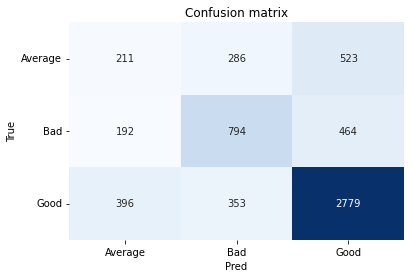

In [14]:
model = DecisionTreeClassifier()
model.fit(X_train_dtm, y_train)
y_pred_class = model.predict(X_test_dtm)

acuracy = metrics.accuracy_score(y_test, y_pred_class)
precision = metrics.precision_score(y_test, y_pred_class, average='macro')
recall = metrics.recall_score(y_test, y_pred_class, average='macro')
f1score = metrics.f1_score(y_test, y_pred_class, average='macro')

print("\nDecision Tree:")
print("\tAccuracy:",acuracy)
print("\tPrecision:",precision)
print("\tRecall:",recall)
print("\tF1-Score:",f1score)

new_row = {'Approach':'Machine Learning + Count Vectorizer + Text Preprocessing', 
           'Algorithm':'Decision Tree', 
           'Accuracy':acuracy, 
           'Precision':precision,
           'Recall':recall,
           'F1-Score':f1score
          }

evaluation = evaluation.append(new_row, ignore_index=True)


print("Detail:")
print(metrics.classification_report(y_test, y_pred_class))

classes = np.unique(y_test)

## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred_class)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)


KNN:
	Accuracy: 0.5958652884294765
	Precision: 0.4749709442190316
	Recall: 0.45431420844199755
	F1-Score: 0.4591137348032091
Detail:
              precision    recall  f1-score   support

     Average       0.22      0.17      0.19      1020
         Bad       0.52      0.39      0.45      1450
        Good       0.69      0.80      0.74      3528

    accuracy                           0.60      5998
   macro avg       0.47      0.45      0.46      5998
weighted avg       0.57      0.60      0.58      5998



(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'Average'), Text(0, 1.5, 'Bad'), Text(0, 2.5, 'Good')])

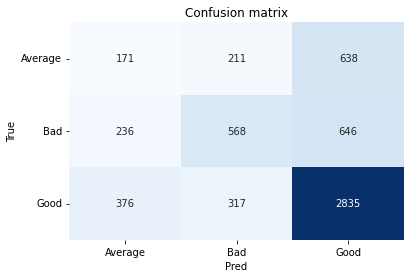

In [15]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_dtm, y_train)
y_pred_class = model.predict(X_test_dtm)

acuracy = metrics.accuracy_score(y_test, y_pred_class)
precision = metrics.precision_score(y_test, y_pred_class, average='macro')
recall = metrics.recall_score(y_test, y_pred_class, average='macro')
f1score = metrics.f1_score(y_test, y_pred_class, average='macro')

print("\nKNN:")
print("\tAccuracy:",acuracy)
print("\tPrecision:",precision)
print("\tRecall:",recall)
print("\tF1-Score:",f1score)

new_row = {'Approach':'Machine Learning + Count Vectorizer + Text Preprocessing', 
           'Algorithm':'KNN', 
           'Accuracy':acuracy, 
           'Precision':precision,
           'Recall':recall,
           'F1-Score':f1score
          }

evaluation = evaluation.append(new_row, ignore_index=True)


print("Detail:")
print(metrics.classification_report(y_test, y_pred_class))

classes = np.unique(y_test)

## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred_class)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)


Random Forest:
	Accuracy: 0.7097365788596198
	Precision: 0.6381458114891007
	Recall: 0.5170166610705585
	F1-Score: 0.4975035776804438
Detail:
              precision    recall  f1-score   support

     Average       0.46      0.02      0.03      1020
         Bad       0.75      0.56      0.64      1450
        Good       0.70      0.97      0.81      3528

    accuracy                           0.71      5998
   macro avg       0.64      0.52      0.50      5998
weighted avg       0.67      0.71      0.64      5998



(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'Average'), Text(0, 1.5, 'Bad'), Text(0, 2.5, 'Good')])

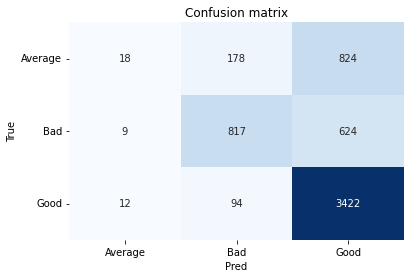

In [16]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train_dtm, y_train)
y_pred_class = model.predict(X_test_dtm)

acuracy = metrics.accuracy_score(y_test, y_pred_class)
precision = metrics.precision_score(y_test, y_pred_class, average='macro')
recall = metrics.recall_score(y_test, y_pred_class, average='macro')
f1score = metrics.f1_score(y_test, y_pred_class, average='macro')

print("\nRandom Forest:")
print("\tAccuracy:",acuracy)
print("\tPrecision:",precision)
print("\tRecall:",recall)
print("\tF1-Score:",f1score)

new_row = {'Approach':'Machine Learning + Count Vectorizer + Text Preprocessing', 
           'Algorithm':'Random Forest', 
           'Accuracy':acuracy, 
           'Precision':precision,
           'Recall':recall,
           'F1-Score':f1score
          }

evaluation = evaluation.append(new_row, ignore_index=True)


print("Detail:")
print(metrics.classification_report(y_test, y_pred_class))

classes = np.unique(y_test)

## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred_class)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

In [17]:
evaluation.to_csv('results.csv')